# Chapter 4: Conditional Probability

In the previous chapters, we laid the groundwork for probability, exploring sample spaces, events, and counting techniques. Now, we venture into one of the most fundamental and powerful concepts in probability theory: **conditional probability**.

Often, we are interested in the probability of an event occurring *given that* another event has already happened. Our knowledge or assumptions about one event can change our assessment of the probability of another. This is the essence of conditional probability. It allows us to update our beliefs in the face of new information.

## 1. Definition and Intuition

**Conditional Probability** measures the probability of an event $A$ occurring given that another event $B$ has already occurred (or is known to have occurred). We denote this as $P(A|B)$, read as "the probability of A given B".

**Intuition:** Imagine the entire sample space $S$. When we know that event $B$ has occurred, our focus effectively narrows down from the entire sample space $S$ to just the outcomes within $B$. We are now interested in the probability that $A$ occurs *within this new, reduced sample space* $B$. The outcomes favourable to "A given B" are those that belong to both $A$ and $B$, i.e., $A \cap B$.

**Formal Definition:**
For any two events $A$ and $B$ from a sample space $S$, where $P(B) > 0$, the conditional probability of $A$ given $B$ is defined as:

$$ P(A|B) = \frac{P(A \cap B)}{P(B)} $$

where:
* $P(A \cap B)$ is the probability that both events $A$ and $B$ occur.
* $P(B)$ is the probability that event $B$ occurs.

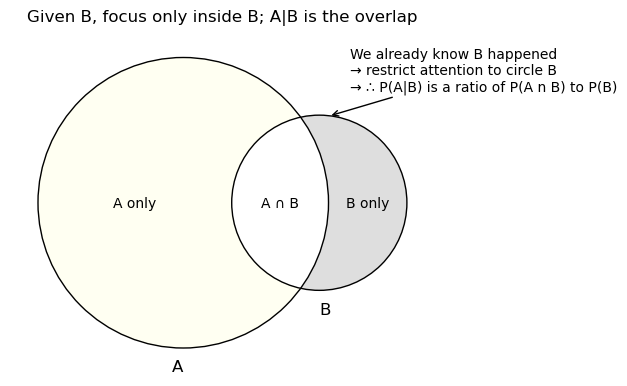

In [57]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles

# Dice example counts (out of 36 equally likely outcomes)
# A: at least one 3  -> 11 outcomes
# B: sum is 9        ->  4 outcomes
# A ∩ B              ->  2 outcomes
# A only = 9, B only = 2, intersection = 2

plt.figure(figsize=(7, 4.5))
v = venn2(
    subsets=(9, 2, 2), 
    set_colors=('lightyellow', '#aeaeae'),
)
venn2_circles(subsets=(9, 2, 2), linestyle='solid', linewidth=1)


# Label the conditional region (A|B) as the overlap inside B
if v.get_label_by_id('11') is not None:
    v.get_label_by_id('11').set_text('A ∩ B')

if v.get_label_by_id('01') is not None:
    v.get_label_by_id('01').set_text('B only')

if v.get_label_by_id('10') is not None:
    v.get_label_by_id('10').set_text('A only')

plt.title('Given B, focus only inside B; A|B is the overlap')

# Add a short note to mirror the “we already have B” idea
plt.annotate(
    'We already know B happened\n→ restrict attention to circle B\n→ \u2234 P(A|B) is a ratio of P(A n B) to P(B)',
    xy=(0.75, .75), xycoords='axes fraction',
    xytext=(0.8, 0.95), textcoords='axes fraction',
    arrowprops=dict(arrowstyle='->', lw=1),
    ha='left', va='top'
)

plt.show()

---

### Example: Two Dice — “At least one 3” given “sum is 9”

Roll two fair six‑sided dice.

- Let **A** be the event *“at least one die shows a 3”*.
- Let **B** be the event *“the sum of the two dice is 9”*.

We want the conditional probability $P(A\mid B)$.

#### Step 1 — List the outcomes in $B$
The outcomes (ordered pairs) that sum to 9 are:
$$B = \{(3,6),(4,5),(5,4),(6,3)\}.$$
So $|B|=4$ and therefore $P(B)=4/36$.

#### Step 2 — Find which of those outcomes also lie in $A$
Within $B$, the outcomes that include a 3 are:
$$A\cap B = \{(3,6),(6,3)\}.$$
So $|A\cap B|=2$ and therefore $P(A\cap B)=2/36$.

#### Step 3 — Apply the definition
$$P(A\mid B)=\frac{P(A\cap B)}{P(B)} = \frac{2/36}{4/36}=\frac12.$$

**Intuition:** once we’re told $B$ happened, the “new sample space” is just the 4 outcomes in $B$. In that restricted space, 2 of the 4 outcomes satisfy $A$, so $P(A\mid B)=2/4=1/2$.


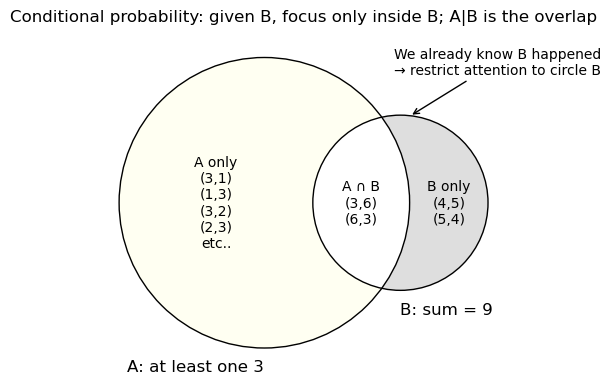

In [42]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles

# Dice example counts (out of 36 equally likely outcomes)
# A: at least one 3  -> 11 outcomes
# B: sum is 9        ->  4 outcomes
# A ∩ B              ->  2 outcomes
# A only = 9, B only = 2, intersection = 2

plt.figure(figsize=(7, 4.5))
v = venn2(
    subsets=(9, 2, 2), 
    set_labels=('A: at least one 3', 'B: sum = 9'),
    set_colors=('lightyellow', '#aeaeae'),
)
venn2_circles(subsets=(9, 2, 2), linestyle='solid', linewidth=1)


# Label the conditional region (A|B) as the overlap inside B
if v.get_label_by_id('11') is not None:
    v.get_label_by_id('11').set_text('A ∩ B\n(3,6)\n(6,3)')

if v.get_label_by_id('01') is not None:
    v.get_label_by_id('01').set_text('B only\n(4,5)\n(5,4)')

if v.get_label_by_id('10') is not None:
    v.get_label_by_id('10').set_text('A only\n(3,1)\n(1,3)\n(3,2)\n(2,3)\netc..')

plt.title('Conditional probability: given B, focus only inside B; A|B is the overlap')

# Add a short note to mirror the “we already have B” idea
plt.annotate(
    'We already know B happened\n→ restrict attention to circle B',
    xy=(0.75, .75), xycoords='axes fraction',
    xytext=(1.2, 0.95), textcoords='axes fraction',
    arrowprops=dict(arrowstyle='->', lw=1),
    ha='right', va='top'
)

plt.show()

## 2. The Multiplication Rule for Conditional Probability

Rearranging the definition of conditional probability gives us the **General Multiplication Rule**, which is useful for calculating the probability of the intersection of two events:

$$ P(A \cap B) = P(A|B) P(B) $$

Similarly, if $P(A) > 0$, we can write:

$$ P(A \cap B) = P(B|A) P(A) $$

This rule is particularly helpful when dealing with sequential events, where the outcome of the first event affects the probability of the second.

**Example:** Probability of drawing two Kings from a standard 52-card deck without replacement.
Let $A$ be the event "the first card drawn is a King" and $B$ be the event "the second card drawn is a King".
We want to find $P(A \cap B)$.
Using the multiplication rule: $P(A \cap B) = P(B|A) P(A)$.
* $P(A)$: There are 4 Kings in 52 cards, so $P(A) = \frac{4}{52}$.
* $P(B|A)$: *Given* that the first card was a King, there are now 3 Kings left in the remaining 51 cards. So, $P(B|A) = \frac{3}{51}$.

Therefore,

$$
\begin{align*}
P(\text{Draw 2 Kings}) &= P(A \cap B) \\
&= P(B|A) P(A) \\
&= \frac{3}{51} \times \frac{4}{52} \\
&= \frac{12}{2652} \\
&\approx 0.0045
\end{align*}
$$

This rule can be extended to more than two events. For three events $A, B, C$:

$$ P(A \cap B \cap C) = P(C | A \cap B) P(B | A) P(A) $$

## 3. The Law of Total Probability

Sometimes, calculating the probability of an event $A$ directly is difficult. However, we might know the conditional probabilities of $A$ occurring under various mutually exclusive and exhaustive scenarios. The Law of Total Probability allows us to find the overall probability of $A$ by considering these scenarios.

**Definition:** Let $B_1, B_2, \ldots, B_n$ be a **partition** of the sample space $S$. This means:
1.  $B_i \cap B_j = \emptyset$ for all $i \neq j$ (The events are mutually exclusive).
2.  $B_1 \cup B_2 \cup \ldots \cup B_n = S$ (The events cover the entire sample space, they are exhaustive).
3.  $P(B_i) > 0$ for all $i$.

Then, for any event $A$ in the sample space $S$, the Law of Total Probability states:

$$ P(A) = \sum_{i=1}^{n} P(A | B_i) P(B_i) $$

$$
\begin{align*}
P(A) ={}& P(A|B_1)P(B_1) \\
& + P(A|B_2)P(B_2) \\
& + \ldots \\
& + P(A|B_n)P(B_n)
\end{align*}
$$

**Intuition:** The overall probability of $A$ is a weighted average of its conditional probabilities under each scenario ($B_i$), where the weights are the probabilities of those scenarios ($P(B_i)$) themselves.

**Example:** Finding the overall probability a randomly selected person has COVID, considering different testing rates and infection probabilities in different age groups.
Let $A$ be the event "a person has COVID".
Let $B_1$ be the event "person is in Age Group 1", $B_2$ be "person is in Age Group 2", ..., $B_n$ be "person is in Age Group n". These age groups form a partition of the population.
We might know:
* The probability a person falls into each age group: $P(B_1), P(B_2), \ldots, P(B_n)$.
* The probability a person has COVID *given* they are in a specific age group: $P(A|B_1), P(A|B_2), \ldots, P(A|B_n)$.

Using the Law of Total Probability, we can calculate the overall probability of having COVID:

$$
\begin{align*}
P(A) ={}& P(A|B_1)P(B_1) \\
& + P(A|B_2)P(B_2) \\
& + \ldots \\
& + P(A|B_n)P(B_n)
\end{align*}
$$

## 4. Tree Diagrams

Tree diagrams are a useful visualization tool for problems involving sequences of events, especially when conditional probabilities are involved.

* Each branch represents an event.
* The probability of each event is written on the branch.
* Branches emanating from a single point represent mutually exclusive outcomes of a stage, and their probabilities should sum to 1.
* The probability of reaching a specific endpoint (a sequence of events) is found by multiplying the probabilities along the path leading to that endpoint (using the Multiplication Rule).
* The probability of an event that can occur via multiple paths is found by summing the probabilities of those paths (related to the Law of Total Probability).

**Example:** Visualizing the probabilities of outcomes in a sequence of two potentially biased coin flips.
Suppose a coin has $P(\text{Heads}) = 0.6$ and $P(\text{Tails}) = 0.4$. We flip it twice. The outcomes are independent.

```
             Start
          /        \
      0.6/          \0.4
        H            T       <-- Flip 1
      /   \        /   \
  0.6/  0.4\   0.6/  0.4\
    H       T   H        T   <-- Flip 2

```

* **Path 1 (HH):** 

$$
\begin{align*}
P(H_1 \cap H_2) &= P(H_1) \times P(H_2 | H_1) \\
&= 0.6 \times 0.6 \\
&= 0.36
\end{align*}
$$
$$
\text{(Since flips are independent, } P(H_2|H_1) = P(H_2) = 0.6 \text{)}
$$

* **Path 2 (HT):** $P(\text{H on 1st} \cap \text{T on 2nd}) = 0.6 \times 0.4 = 0.24$.
* **Path 3 (TH):** $P(\text{T on 1st} \cap \text{H on 2nd}) = 0.4 \times 0.6 = 0.24$.
* **Path 4 (TT):** $P(\text{T on 1st} \cap \text{T on 2nd}) = 0.4 \times 0.4 = 0.16$.

Note that the probabilities of all possible outcomes sum to 1: $0.36 + 0.24 + 0.24 + 0.16 = 1.0$.

We can use this to find probabilities of combined events, e.g., 

$$
\begin{align*}
P(\text{Exactly one Head}) &= P(HT) + P(TH) \\
&= 0.24 + 0.24 \\
&= 0.48
\end{align*}
$$

## 5. Tips for differentiating between $P(A \cap B)$ and $P(A | B)$

It can be challenging to differentiate between $P(A \cap B)$ and $P(A | B)$ in probability problems.

**$P(A \cap B)$** represents the **probability that both event A AND event B occur**. Look for keywords like "**and**," "**both**," or phrases indicating a direct overlap between two characteristics. For example, "the probability that a student is an engineering major **and** is female."

**$P(A | B)$** signifies the **probability of event A occurring GIVEN that event B has already occurred**. This is a **conditional probability**, focusing on a subset of the population. Phrases such as "**given that**," "**of those who**," or "**if a [characteristic B] is selected**" are strong indicators. For instance, "Of the students who study engineering, 20% are female" is an example of $P(\text{Female} | \text{Engineering})$.

The key distinction lies in whether the problem describes the likelihood of two events happening simultaneously (intersection) or the likelihood of one event happening *under the condition* that another event has already happened (conditional).

## 6. Hands-on: Simulations and Calculations

Let's use Python to explore these concepts. We'll need libraries like `numpy` for numerical operations and random sampling, and potentially `pandas` for handling data.

In [1]:
import numpy as np
import pandas as pd
import random

### 6.1 Simulating Conditional Events: Drawing Cards

Let's simulate drawing two cards from a standard 52-card deck *without replacement* and verify the conditional probability $P(\text{2nd is King} | \text{1st is King})$. We expect this to be $3/51$.

```{admonition} Explanation
:class: dropdown
**Conditional Probability: $P(\text{2nd is King} | \text{1st is King}) = 3/51$**

Imagine you've already drawn one card, and it's a King. Since we're drawing *without replacement*, that King is now out of the deck.

* **Remaining Cards:** After drawing one King, there are now $52 - 1 = 51$ cards left in the deck.
* **Remaining Kings:** Since one King has been removed, there are now $4 - 1 = 3$ Kings remaining.

Therefore, the probability that the second card you draw is a King, *given* that the first card was a King, is the number of remaining Kings divided by the total number of remaining cards, which is $\frac{3}{51}$.
```

We can also estimate the overall probability $P(\text{2nd is King})$. By symmetry or using the Law of Total Probability, this should be $4/52$.

```{admonition} Explanation
:class: dropdown
**Overall Probability: $P(\text{2nd is King}) = 4/52$**

Now, let's think about the probability of the second card being a King without knowing anything about the first card. There are a couple of ways to see why this is $4/52$:

1.  **Symmetry:** Consider each of the 52 cards in the deck. Each card has an equal chance of being in the second position of the draw. Since there are 4 Kings in the deck, the probability that the card in the second position is a King must be the same as the probability that the card in the first position is a King, which is $\frac{4}{52}$.

2.  **Law of Total Probability (Implicitly):** We can think about the two possibilities for the first card:

    * **Case 1: The first card is a King.** The probability of this is $P(\text{1st is King}) = \frac{4}{52}$. In this case, the probability of the second card being a King is $P(\text{2nd is King} | \text{1st is King}) = \frac{3}{51}$.
    * **Case 2: The first card is not a King.** The probability of this is $P(\text{1st is not King}) = \frac{48}{52}$. In this case, there are still 4 Kings left in the remaining 51 cards, so the probability of the second card being a King is $P(\text{2nd is King} | \text{1st is not King}) = \frac{4}{51}$.

    Using the Law of Total Probability:


    $$
    \begin{aligned}
    P(\text{2nd King}) &= P(\text{2nd King} | \text{1st King})P(\text{1st King}) \\
    &\quad + P(\text{2nd King} | \text{1st Not King})P(\text{1st Not King})
    \end{aligned}
    $$

    $$
    \begin{aligned}
    P(\text{2nd King}) &= \left(\frac{3}{51}\right)\left(\frac{4}{52}\right) + \left(\frac{4}{51}\right)\left(\frac{48}{52}\right) \\
    &= \frac{12 + 192}{51 \times 52} \\
    &= \frac{204}{2652} \\
    &= \frac{4}{52}
    \end{aligned}
    $$
```

So, both our intuition and a more formal application of probability rules confirm these results! Now, are you ready to simulate this?

In [2]:
# Represent the deck
ranks = ['2', '3', '4', '5', '6', '7', '8', '9', 'T', 'J', 'Q', 'K', 'A']
suits = ['H', 'D', 'C', 'S'] # Hearts, Diamonds, Clubs, Spades
deck = [rank + suit for rank in ranks for suit in suits]
kings = {'KH', 'KD', 'KC', 'KS'}

In [3]:
# Simulation parameters
num_simulations = 100000

In [4]:
# Counters
count_first_king = 0
count_second_king = 0
count_both_king = 0
count_second_king_given_first_king = 0

In [5]:
# Run simulations
for _ in range(num_simulations):
    # Shuffle the deck implicitly by drawing random samples
    drawn_cards = random.sample(deck, 2)
    card1 = drawn_cards[0]
    card2 = drawn_cards[1]

    # Check conditions
    is_first_king = card1 in kings
    is_second_king = card2 in kings

    if is_first_king:
        count_first_king += 1
        if is_second_king:
            count_second_king_given_first_king += 1

    if is_second_king:
        count_second_king += 1

    if is_first_king and is_second_king:
        count_both_king += 1

In [6]:
# Calculate probabilities from simulation
prob_first_king_sim = count_first_king / num_simulations
prob_second_king_sim = count_second_king / num_simulations
prob_both_king_sim = count_both_king / num_simulations

In [7]:
# Calculate conditional probability P(B|A) = P(A and B) / P(A)
# We can estimate this directly from the counts:
if count_first_king > 0:
    prob_second_given_first_sim = count_second_king_given_first_king / count_first_king
else:
    prob_second_given_first_sim = 0

In [8]:
# Theoretical values
prob_first_king_theory = 4/52
prob_second_king_theory = 4/52 # By symmetry
prob_both_king_theory = (4/52) * (3/51)
prob_second_given_first_theory = 3/51

In [9]:
# Print results
print(f"--- Theoretical Probabilities ---")
print(f"P(1st is King): {prob_first_king_theory:.6f} ({4}/{52})")
print(f"P(2nd is King): {prob_second_king_theory:.6f} ({4}/{52})")
print(f"P(Both Kings): {prob_both_king_theory:.6f}")
print(f"P(2nd is King | 1st is King): {prob_second_given_first_theory:.6f} ({3}/{51})")
print("\n")
print(f"--- Simulation Results ({num_simulations} runs) ---")
print(f"Estimated P(1st is King): {prob_first_king_sim:.6f}")
print(f"Estimated P(2nd is King): {prob_second_king_sim:.6f}")
print(f"Estimated P(Both Kings): {prob_both_king_sim:.6f}")
print(f"Estimated P(2nd is King | 1st is King): {prob_second_given_first_sim:.6f}")

--- Theoretical Probabilities ---
P(1st is King): 0.076923 (4/52)
P(2nd is King): 0.076923 (4/52)
P(Both Kings): 0.004525
P(2nd is King | 1st is King): 0.058824 (3/51)


--- Simulation Results (100000 runs) ---
Estimated P(1st is King): 0.077270
Estimated P(2nd is King): 0.076120
Estimated P(Both Kings): 0.004400
Estimated P(2nd is King | 1st is King): 0.056943


The simulation results should be very close to the theoretical values, demonstrating how simulation can approximate probabilistic calculations. The larger `num_simulations`, the closer the estimates will typically be.

### 6.2 Calculating Conditional Probabilities from Data

Imagine we have data about website visitors, including whether they made a purchase and whether they visited a specific product page first. We can use Pandas to calculate conditional probabilities from this data.

#### Sample Data

A DataFrame is created with data on website visitors, including whether they visited a specific product page and whether they made a purchase.

In [25]:
import pandas as pd

# Create sample data
data = {
    'visited_product_page': [True, False, True, True, False, False, True, True, False, True],
    'made_purchase':        [True, False, False, True, False, True, False, True, False, False]
}
df = pd.DataFrame(data)

print("Sample Visitor Data:")
display(df)
print("\n")

Sample Visitor Data:


,visited_product_page,made_purchase
0,True,True
1,False,False
2,True,False
3,True,True
4,False,False
5,False,True
6,True,False
7,True,True
8,False,False
9,True,False


#### Approach 1: Calculated Conditional Probability

First calculate basic probabilities:

- **Basic Probabilities**: The total number of visitors, visitors who visited the product page, visitors who made a purchase, and visitors who both visited the product page and made a purchase are calculated. These are used to compute the basic probabilities:
  - $ P(\text{Visited Page}) $
  - $ P(\text{Purchased}) $
  - $ P(\text{Visited and Purchased}) $

In [26]:
# Calculate basic probabilities
n_total = len(df)
n_visited_page = df['visited_product_page'].sum()
n_purchased = df['made_purchase'].sum()
n_visited_and_purchased = len(df[(df['visited_product_page'] == True) & (df['made_purchase'] == True)])

P_visited = n_visited_page / n_total
P_purchased = n_purchased / n_total
P_visited_and_purchased = n_visited_and_purchased / n_total

print(f"P(Visited Page) = {P_visited:.2f}")
print(f"P(Purchased) = {P_purchased:.2f}")
print(f"P(Visited and Purchased) = {P_visited_and_purchased:.2f}")
print("\n")

P(Visited Page) = 0.60
P(Purchased) = 0.40
P(Visited and Purchased) = 0.30




Next calculate conditional probabilities:

- **Definition**: This approach uses the fundamental rules of probability to derive conditional probabilities.
- **Calculations**:
  - **$ P(\text{Purchased} \mid \text{Visited Page}) $**: Calculated using the formula $ P(A \mid B) = \frac{P(A \cap B)}{P(B)} $, where $ A $ is "Purchased" and $ B $ is "Visited Page".
  - **$ P(\text{Visited Page} \mid \text{Purchased}) $**: Similarly calculated using the same probability rule.
- **Advantage**: This method is useful when you already have the probabilities $ P(A \cap B) $ and $ P(B) $ and want to use them to find the conditional probability. It's also helpful for understanding the theoretical underpinnings of conditional probability.

In [27]:
# Calculate Conditional Probability: P(Purchase | Visited Page)
if P_visited > 0:
    P_purchased_given_visited = P_visited_and_purchased / P_visited
    print(f"Calculated P(Purchased | Visited Page) = {P_purchased_given_visited:.2f}")
else:
    print("Cannot calculate P(Purchased | Visited Page) as P(Visited Page) is 0.")

# Calculate Conditional Probability: P(Visited Page | Purchased)
if P_purchased > 0:
    P_visited_given_purchased = P_visited_and_purchased / P_purchased
    print(f"Calculated P(Visited Page | Purchased) = {P_visited_given_purchased:.2f}")
else:
    print("Cannot calculate P(Visited Page | Purchased) as P(Purchased) is 0.")


Calculated P(Purchased | Visited Page) = 0.50
Calculated P(Visited Page | Purchased) = 0.75


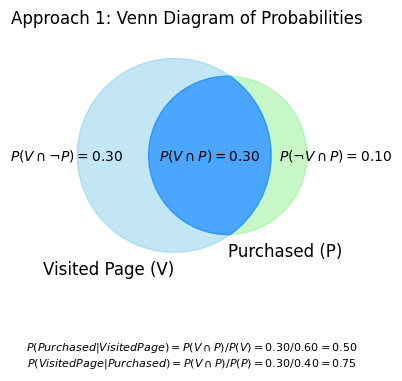

In [61]:
# Visualization for Approach 1: Venn Diagram
plt.figure(figsize=(4, 3))

# Sizes: (Size of V only, Size of P only, Size of V & P)
venn_diagram = venn2(subsets=(round(P_visited - P_visited_and_purchased, 2),
                              round(P_purchased - P_visited_and_purchased, 2),
                              round(P_visited_and_purchased, 2)),
                     set_labels=('Visited Page (V)', 'Purchased (P)'))

if venn_diagram: # Check if venn_diagram was successfully created
    # Color coding the areas
    if venn_diagram.get_patch_by_id('10'): # V only
        venn_diagram.get_patch_by_id('10').set_alpha(0.5)
        venn_diagram.get_patch_by_id('10').set_color('skyblue')
    if venn_diagram.get_patch_by_id('01'): # P only
        venn_diagram.get_patch_by_id('01').set_alpha(0.5)
        venn_diagram.get_patch_by_id('01').set_color('lightgreen')
    if venn_diagram.get_patch_by_id('11'): # V and P
        venn_diagram.get_patch_by_id('11').set_alpha(0.8)
        venn_diagram.get_patch_by_id('11').set_color('dodgerblue')

    # Setting text and adjusting positions for each area
    label_10 = venn_diagram.get_label_by_id('10') # V only area
    if label_10:
      label_10.set_text(f'$P(V \\cap \\neg P) = {P_visited - P_visited_and_purchased:.2f}$')
      # Move label '10' to the left
      current_position_10 = label_10.get_position()
      x_offset_10 = -0.25 # Negative value to move left
      label_10.set_position((current_position_10[0] + x_offset_10, current_position_10[1]))

    label_01 = venn_diagram.get_label_by_id('01') # P only area
    if label_01:
      label_01.set_text(f'$P(\\neg V \\cap P) = {P_purchased - P_visited_and_purchased:.2f}$')
      current_position_01 = label_01.get_position()
      x_offset_01 = 0.25 # Positive value to move right
      label_01.set_position((current_position_01[0] + x_offset_01, current_position_01[1]))

    label_intersection = venn_diagram.get_label_by_id('11') # V and P intersection
    if label_intersection:
      label_intersection.set_text(f'$P(V \\cap P) = {P_visited_and_purchased:.2f}$')
      current_position_intersection = label_intersection.get_position()
      y_offset_intersection = 0.0 # Adjust this value to move the label higher
      label_intersection.set_position((current_position_intersection[0], current_position_intersection[1] + y_offset_intersection))

plt.suptitle('Approach 1: Venn Diagram of Probabilities')
plt.title(
          f'$P(Purchased | Visited Page) = P(V \\cap P) / P(V) = {P_visited_and_purchased:.2f} / {P_visited:.2f} = {P_purchased_given_visited:.2f}$\n'
          f'$P(Visited Page | Purchased) = P(V \\cap P) / P(P) = {P_visited_and_purchased:.2f} / {P_purchased:.2f} = {P_visited_given_purchased:.2f}$',
          fontsize=8, y=-0.45)
plt.show()

This Venn diagram visually clarifies how different probabilities are related:

* **Specific Outcomes:** The values inside each distinct segment of the diagram show the probability of that particular, unique scenario occurring. For example:
    * $P(V \cap \neg P)$ represents the probability of a visitor 'Visiting the Page but Not Purchasing'.
    * $P(V \cap P)$ represents the probability of a visitor 'Visiting the Page AND Purchasing'.

* **Total Event Probabilities:** The total probability for an entire event (like 'Visited Page', denoted as $P(V)$) is found by summing the probabilities of all the individual segments that make up that event.
    * For instance, $P(V) = P(V \cap \neg P) + P(V \cap P)$.

* **Components for Conditional Probability:** This total probability (e.g., $P(V)$), along with the probability of the intersection (e.g., $P(V \cap P)$), are the essential values used in the formula for conditional probability.
    * For example, $P(\text{Purchased} | \text{Visited Page}) = P(V \cap P) / P(V)$.

* **Visualizing the Sample Space:** The diagram effectively helps to see how the entire circle of the conditioning event (e.g., the 'Visited Page' circle, representing the total $P(V)$) becomes the new, reduced sample space when calculating a conditional probability.

#### Approach 2: Direct Conditional Probability

- **Definition**: This approach involves filtering the data to directly calculate the conditional probabilities from the relevant subset of data.
- **Calculations**:
  - **$ P(\text{Purchased} \mid \text{Visited Page}) $**: The DataFrame is filtered to include only visitors who visited the product page. The number of these visitors who made a purchase is then divided by the total number of visitors who visited the page.
  - **$ P(\text{Visited Page} \mid \text{Purchased}) $**: The DataFrame is filtered to include only visitors who made a purchase. The number of these visitors who visited the product page is then divided by the total number of visitors who made a purchase.
- **Advantage**: This method is straightforward and intuitive because it directly uses the relevant subset of data.

In [29]:
# Direct calculation from counts: P(Purchase | Visited Page)
df_visited = df[df['visited_product_page'] == True]
n_purchased_in_visited = df_visited['made_purchase'].sum()
n_visited = len(df_visited)

if n_visited > 0:
    P_purchased_given_visited_direct = n_purchased_in_visited / n_visited
    print(f"Direct P(Purchased | Visited Page) = {P_purchased_given_visited_direct:.2f} ({n_purchased_in_visited}/{n_visited})")
else:
    print("Cannot calculate P(Purchased | Visited Page) directly as no one visited the page.")

# Direct calculation from counts: P(Visited Page | Purchased)
df_purchased = df[df['made_purchase'] == True]
n_visited_in_purchased = df_purchased['visited_product_page'].sum()
n_purchased_total = len(df_purchased)

if n_purchased_total > 0:
    P_visited_given_purchased_direct = n_visited_in_purchased / n_purchased_total
    print(f"Direct P(Visited Page | Purchased) = {P_visited_given_purchased_direct:.2f} ({n_visited_in_purchased}/{n_purchased_total})")
else:
    print("Cannot calculate P(Visited Page | Purchased) directly as no one made a purchase.")


Direct P(Purchased | Visited Page) = 0.50 (3/6)
Direct P(Visited Page | Purchased) = 0.75 (3/4)


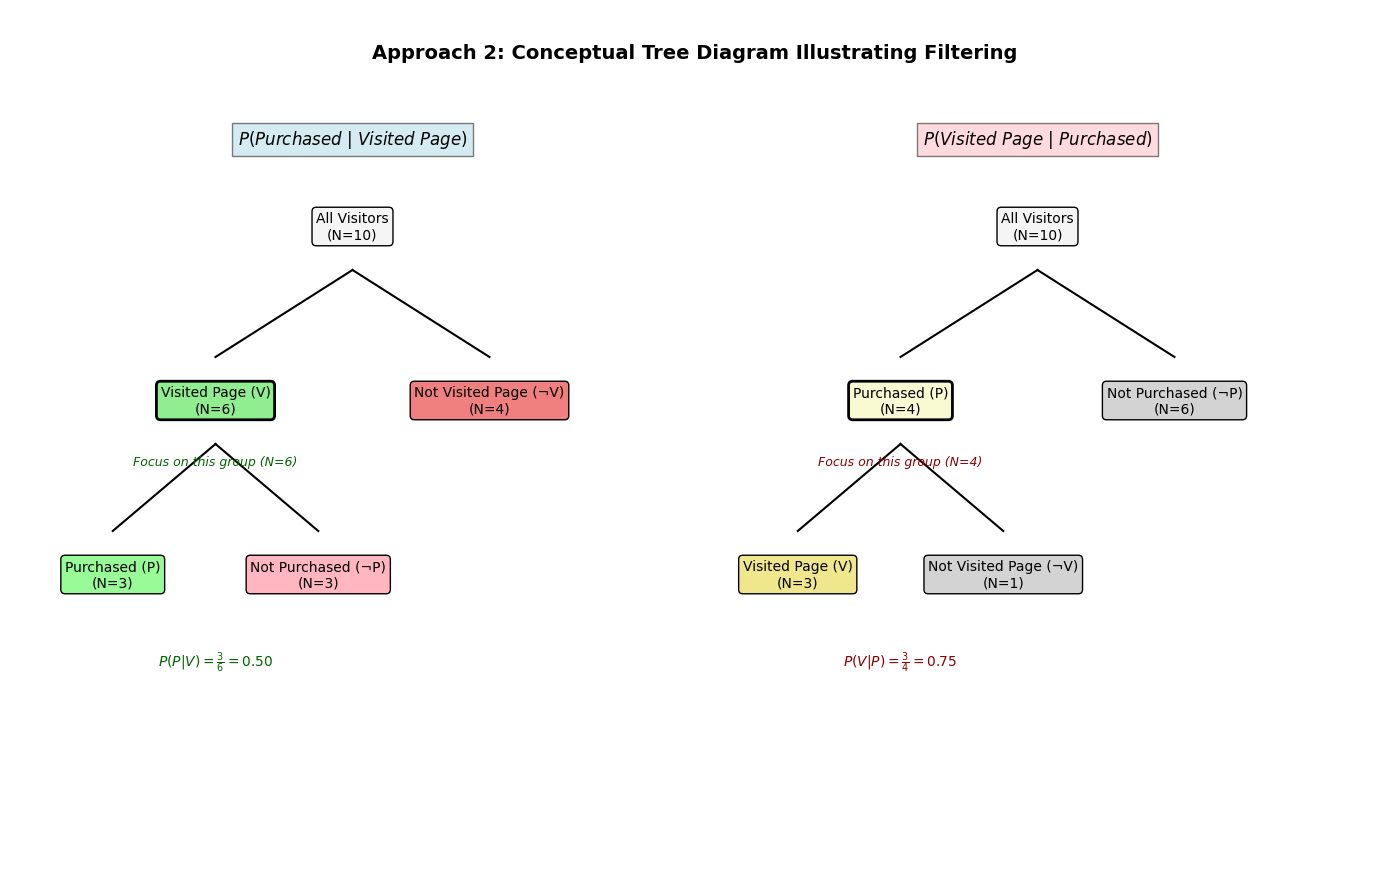

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd # Added for completeness if you run this standalone with the sample data

# Conceptual Tree Diagram for Approach 2
fig_tree, ax_tree = plt.subplots(figsize=(14, 9)) # Increased size for better readability
ax_tree.set_xlim(0, 10)
ax_tree.set_ylim(0, 10)
ax_tree.axis('off')
ax_tree.text(5, 9.5, "Approach 2: Conceptual Tree Diagram Illustrating Filtering", ha='center', va='center', fontsize=14, weight='bold')

# --- Branch for P(Purchased | Visited Page) ---
ax_tree.text(2.5, 8.5, "$P(Purchased \ | \ Visited \ Page)$", ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightblue', alpha=0.5))
# Root: All Visitors
ax_tree.text(2.5, 7.5, f"All Visitors\n(N={n_total})", ha='center', va='center', bbox=dict(boxstyle="round,pad=0.3", fc="whitesmoke", ec="black"))
# Branch to Visited Page / Not Visited Page
ax_tree.plot([2.5, 1.5], [7.0, 6.0], 'k-')
ax_tree.plot([2.5, 3.5], [7.0, 6.0], 'k-')
ax_tree.text(1.5, 5.5, f"Visited Page (V)\n(N={n_visited_page})", ha='center', va='center', bbox=dict(boxstyle="round,pad=0.3", fc="lightgreen", ec="black", linewidth=2)) # Conditioned on this group
ax_tree.text(3.5, 5.5, f"Not Visited Page (¬V)\n(N={n_total - n_visited_page})", ha='center', va='center', bbox=dict(boxstyle="round,pad=0.3", fc="lightcoral", ec="black"))

# From "Visited Page" (this is the group of size n_visited), branch to Purchased / Not Purchased
ax_tree.text(1.5, 4.8, f"Focus on this group (N={n_visited})", ha='center', va='center', fontsize=9, style='italic', color='darkgreen')
ax_tree.plot([1.5, 0.75], [5.0, 4.0], 'k-') # Line to Purchased
ax_tree.plot([1.5, 2.25], [5.0, 4.0], 'k-') # Line to Not Purchased
ax_tree.text(0.75, 3.5, f"Purchased (P)\n(N={n_purchased_in_visited})", ha='center', va='center', bbox=dict(boxstyle="round,pad=0.3", fc="palegreen", ec="black"))
# Corrected variable: n_visited (length of df_visited)
ax_tree.text(2.25, 3.5, f"Not Purchased (¬P)\n(N={n_visited - n_purchased_in_visited})", ha='center', va='center', bbox=dict(boxstyle="round,pad=0.3", fc="lightpink", ec="black"))
# Corrected variable: n_visited
ax_tree.text(1.5, 2.5, f"$P(P | V) = \\frac{{{n_purchased_in_visited}}}{{{n_visited}}} = {P_purchased_given_visited_direct:.2f}$", ha='center', va='center', fontsize=10, weight='bold', color='darkgreen')


# --- Branch for P(Visited Page | Purchased) ---
ax_tree.text(7.5, 8.5, "$P(Visited \ Page \ | \ Purchased)$", ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightpink', alpha=0.5))
# Root: All Visitors
ax_tree.text(7.5, 7.5, f"All Visitors\n(N={n_total})", ha='center', va='center', bbox=dict(boxstyle="round,pad=0.3", fc="whitesmoke", ec="black"))
# Branch to Purchased / Not Purchased
ax_tree.plot([7.5, 6.5], [7.0, 6.0], 'k-')
ax_tree.plot([7.5, 8.5], [7.0, 6.0], 'k-')
ax_tree.text(6.5, 5.5, f"Purchased (P)\n(N={n_purchased})", ha='center', va='center', bbox=dict(boxstyle="round,pad=0.3", fc="lightgoldenrodyellow", ec="black", linewidth=2)) # Conditioned on this group
ax_tree.text(8.5, 5.5, f"Not Purchased (¬P)\n(N={n_total - n_purchased})", ha='center', va='center', bbox=dict(boxstyle="round,pad=0.3", fc="lightgrey", ec="black"))

# From "Purchased" (this is the group of size n_purchased_total), branch to Visited Page / Not Visited Page
ax_tree.text(6.5, 4.8, f"Focus on this group (N={n_purchased_total})", ha='center', va='center', fontsize=9, style='italic', color='darkred')
ax_tree.plot([6.5, 5.75], [5.0, 4.0], 'k-') # Line to Visited Page
ax_tree.plot([6.5, 7.25], [5.0, 4.0], 'k-') # Line to Not Visited Page
ax_tree.text(5.75, 3.5, f"Visited Page (V)\n(N={n_visited_in_purchased})", ha='center', va='center', bbox=dict(boxstyle="round,pad=0.3", fc="khaki", ec="black"))
# Corrected variable: n_purchased_total (length of df_purchased)
ax_tree.text(7.25, 3.5, f"Not Visited Page (¬V)\n(N={n_purchased_total - n_visited_in_purchased})", ha='center', va='center', bbox=dict(boxstyle="round,pad=0.3", fc="lightgray", ec="black"))
# Corrected variable: n_purchased_total
ax_tree.text(6.5, 2.5, f"$P(V | P) = \\frac{{{n_visited_in_purchased}}}{{{n_purchased_total}}} = {P_visited_given_purchased_direct:.2f}$", ha='center', va='center', fontsize=10, weight='bold', color='darkred')

plt.tight_layout()
plt.show()

This tree diagram illustrates the direct approach to conditional probability by visually segmenting the visitor population based on a sequence of events or conditions. To find $P(\text{Purchased} | \text{Visited Page})$, for instance, you first follow the branch representing 'Visited Page', effectively filtering the data, and then observe the proportion of those visitors who subsequently 'Made Purchase'. The diagram clearly shows how the initial condition narrows the focus to a specific subgroup before the probability of the second event is determined within that subgroup.

#### Summary

- **Calculated Approach**: Uses probability rules to derive conditional probabilities from known probabilities.
- **Direct Approach**: Filters the data to the condition and performs the calculation on the filtered data.

Both approaches should yield the same results if done correctly, and the choice between them can depend on the context and what data or probabilities you already have at hand.

This example shows how to compute conditional probabilities directly from observed data, a common task in data analysis. $P(\text{Purchased} | \text{Visited Page})$ tells us the likelihood of a purchase *among those who visited the specific page*, while $P(\text{Visited Page} | \text{Purchased})$ tells us the likelihood that someone who *did* purchase had previously visited that page. These can be very different values!

### 6.3 Applying the Law of Total Probability

Let's use the Law of Total Probability with a manufacturing example. Suppose a factory has two machines, M1 and M2, producing widgets.
* Machine M1 produces 60% of the widgets ($P(M1) = 0.6$).
* Machine M2 produces 40% of the widgets ($P(M2) = 0.4$).
* 2% of widgets from M1 are defective ($P(D|M1) = 0.02$).
* 5% of widgets from M2 are defective ($P(D|M2) = 0.05$).

What is the overall probability that a randomly selected widget is defective ($P(D)$)?

The events M1 (widget produced by M1) and M2 (widget produced by M2) form a partition of the sample space (all widgets). Using the Law of Total Probability:

$P(D) = P(D|M1)P(M1) + P(D|M2)P(M2)$

In [21]:
# Define probabilities
P_M1 = 0.60
P_M2 = 0.40
P_D_given_M1 = 0.02
P_D_given_M2 = 0.05

In [22]:
# Apply Law of Total Probability
P_D = (P_D_given_M1 * P_M1) + (P_D_given_M2 * P_M2)

In [23]:
print(f"P(Defective | M1) = {P_D_given_M1}")
print(f"P(M1) = {P_M1}")
print(f"P(Defective | M2) = {P_D_given_M2}")
print(f"P(M2) = {P_M2}")
print("\n")
print(f"Overall Probability of a Defective Widget P(D) = ({P_D_given_M1} * {P_M1}) + ({P_D_given_M2} * {P_M2}) = {P_D:.4f}")

P(Defective | M1) = 0.02
P(M1) = 0.6
P(Defective | M2) = 0.05
P(M2) = 0.4


Overall Probability of a Defective Widget P(D) = (0.02 * 0.6) + (0.05 * 0.4) = 0.0320


So, the overall probability of finding a defective widget is 3.2%. This weighted average reflects that while M2 produces more defective items proportionatly, M1 produces more items overall.

We could also simulate this:

In [24]:
num_widgets_sim = 100000
defective_count = 0

In [25]:
for _ in range(num_widgets_sim):
    # Decide which machine produced the widget
    if random.random() < P_M1: # Simulates P(M1)
        # Widget from M1
        # Check if it's defective
        if random.random() < P_D_given_M1: # Simulates P(D|M1)
            defective_count += 1
    else:
        # Widget from M2
        # Check if it's defective
        if random.random() < P_D_given_M2: # Simulates P(D|M2)
            defective_count += 1

In [26]:
# Estimate P(D) from simulation
P_D_sim = defective_count / num_widgets_sim

In [27]:
print(f"\n--- Simulation Results ({num_widgets_sim} widgets) ---")
print(f"Estimated overall P(Defective): {P_D_sim:.4f}")


--- Simulation Results (100000 widgets) ---
Estimated overall P(Defective): 0.0326


Again, the simulation provides an estimate very close to the calculated value.

---

This chapter introduced conditional probability, the multiplication rule, the law of total probability, and tree diagrams. These concepts are crucial for reasoning under uncertainty and form the basis for more advanced topics like Bayes' Theorem, which we will explore in the next chapter. The hands-on examples demonstrated how to calculate and simulate these probabilities using Python.

Okay, here is the entire "Exercises" section with the questions followed by their respective dropdown explanations:

## Exercises

1.  **Two Dice:** If you roll two fair six-sided dice, what is the conditional probability that the sum is 8, given that the first die shows a 3? What is the conditional probability that the first die shows a 3, given that the sum is 8?

    ```{admonition} Answer
    :class: dropdown

    Let D1 be the result of the first die and D2 be the result of the second die. The total number of possible outcomes when rolling two fair six-sided dice is $6 \times 6 = 36$. Each outcome (D1, D2) is equally likely.

    **Part 1: Conditional probability that the sum is 8, given that the first die shows a 3.**
    Let A be the event that the sum is 8.
    Let B be the event that the first die shows a 3.
    We want to find $P(A | B)$.

    The outcomes for event B (first die is 3) are:
    {(3,1), (3,2), (3,3), (3,4), (3,5), (3,6)}. There are 6 such outcomes.
    Given that the first die is 3, for the sum to be 8, the second die (D2) must be $8 - 3 = 5$.
    So, the only outcome where the first die is 3 and the sum is 8 is (3,5).
    Thus, within the reduced sample space where the first die is 3, there is 1 outcome where the sum is 8.
    Therefore, $P(\text{Sum}=8 | \text{First die}=3) = 1/6$.

    Alternatively, using the formula $P(A | B) = P(A \cap B) / P(B)$:
    $P(B) = 6/36 = 1/6$.
    $P(A \cap B)$ (sum is 8 and first die is 3) corresponds to the outcome (3,5), so $P(A \cap B) = 1/36$.
    $P(A | B) = (1/36) / (6/36) = 1/6$.

    **Part 2: Conditional probability that the first die shows a 3, given that the sum is 8.**
    Let A be the event that the sum is 8.
    Let B be the event that the first die shows a 3.
    We want to find $P(B | A)$.

    The outcomes for event A (sum is 8) are:
    {(2,6), (3,5), (4,4), (5,3), (6,2)}. There are 5 such outcomes.
    Given that the sum is 8, we look for outcomes where the first die is 3. The only such outcome is (3,5).
    Thus, within the reduced sample space where the sum is 8, there is 1 outcome where the first die is 3.
    Therefore, $P(\text{First die}=3 | \text{Sum}=8) = 1/5$.

    Alternatively, using the formula $P(B | A) = P(B \cap A) / P(A)$:
    $P(A) = 5/36$.
    $P(B \cap A)$ (first die is 3 and sum is 8) corresponds to the outcome (3,5), so $P(B \cap A) = 1/36$.
    $P(B | A) = (1/36) / (5/36) = 1/5$.
    ```

2.  **Medical Test:** A disease affects 1 in 1000 people. A test for the disease is 99% accurate (i.e., P(Positive | Disease) = 0.99) and has a 2% false positive rate (i.e., P(Positive | No Disease) = 0.02). Use the Law of Total Probability to calculate the overall probability that a randomly selected person tests positive. (We will revisit this in the Bayes' Theorem chapter).

    ```{admonition} Answer
    :class: dropdown

    Let D be the event that a person has the disease, and $\neg D$ be the event that a person does not have the disease.
    Let + be the event that a person tests positive.

    We are given:
    * $P(D) = 1/1000 = 0.001$
    * $P(\text{Positive} | D) = P(+|D) = 0.99$ (test accuracy for those with the disease)
    * $P(\text{Positive} | \neg D) = P(+|\neg D) = 0.02$ (false positive rate)

    From $P(D)$, we can find $P(\neg D)$:
    * $P(\neg D) = 1 - P(D) = 1 - 0.001 = 0.999$

    We need to calculate the overall probability that a randomly selected person tests positive, $P(+)$. We use the Law of Total Probability:
    $P(+) = P(+|D) \cdot P(D) + P(+|\neg D) \cdot P(\neg D)$
    $P(+) = (0.99 \cdot 0.001) + (0.02 \cdot 0.999)$
    $P(+) = 0.00099 + 0.01998$
    $P(+) = 0.02097$

    So, the overall probability that a randomly selected person tests positive is 0.02097, or about 2.097%.
    ```

3.  **Card Simulation:** Modify the card drawing simulation to calculate the probability of drawing two cards of the *same rank* (e.g., two 7s, two Kings, etc.). Compare the simulation result to the theoretical probability. (Hint: The first card can be anything. What's the probability the second matches its rank?).

    ```{admonition} Answer
    :class: dropdown

    **Theoretical Probability:**
    We want to find the probability of drawing two cards of the *same rank* from a standard 52-card deck without replacement.

    * Consider the first card drawn. It can be any card, and its rank is now fixed.
    * For the second card to match the rank of the first, it must be one of the remaining 3 cards of that same rank.
    * There are 51 cards remaining in the deck after the first draw.
    * So, the probability that the second card's rank matches the first card's rank is $3/51$.
    * $3/51 = 1/17$.

    The theoretical probability is $1/17 \approx 0.0588$.

    **Modifying a Card Drawing Simulation:**
    To calculate this probability via simulation:
    1.  **Represent Deck and Cards:** Create a representation of a 52-card deck where each card has a suit and a rank (e.g., 'King of Hearts', '7 of Spades'). Ensure you can easily extract the rank (e.g., 'King', '7').
    2.  **Simulation Loop:** Repeat the following steps for a large number of trials (e.g., 10,000 or 100,000 times):
        a.  **Shuffle and Draw:** Shuffle the deck and draw two cards without replacement.
        b.  **Extract Ranks:** Get the rank of the first card and the rank of the second card.
        c.  **Compare Ranks:** Check if the two ranks are identical.
        d.  **Count Successes:** If the ranks are the same, increment a counter for successful trials.
    3.  **Calculate Simulated Probability:** After all trials are complete, the simulated probability is the number of successful trials divided by the total number of trials.
        $P(\text{same rank}) \approx \text{count of same ranks} / \text{total trials}$
    4.  **Compare:** Compare this simulated result to the theoretical probability of $1/17$. As the number of trials increases, the simulated probability should converge towards the theoretical one.
    ```

4.  **Data Analysis:** Load a real dataset (e.g., the Titanic dataset often used in machine learning introductions) using Pandas. Calculate the conditional probability of survival given the passenger's class (e.g., P(Survived | Class=1st), P(Survived | Class=3rd)). What do these probabilities tell you?

    ```{admonition} Answer
    :class: dropdown

    This exercise involves using a dataset like the Titanic dataset to calculate conditional probabilities with Pandas.

    **Steps:**
    1.  **Load Data:**
        * Import the Pandas library: `import pandas as pd`
        * Load the Titanic dataset. This dataset is often available in libraries like Seaborn (`import seaborn as sns; df = sns.load_dataset('titanic')`) or can be loaded from a CSV file (`df = pd.read_csv('path_to_titanic.csv')`).
        * The DataFrame (`df`) typically contains columns like 'survived' (0 = No, 1 = Yes) and 'pclass' (passenger class: 1, 2, 3).

    2.  **Calculate P(Survived | Class=1st):**
        * This is the probability of a passenger surviving, given they were in 1st class.
        * **Filter for 1st Class:** Create a subset of the DataFrame containing only 1st class passengers:
            `df_class1 = df[df['pclass'] == 1]`
        * **Calculate Survival Rate:** Within this subset, find the proportion of passengers who survived. If 'survived' is coded as 1 for survived and 0 for not, the mean of the 'survived' column gives this probability:
            `P_survived_given_class1 = df_class1['survived'].mean()`
            Alternatively, count survivors and divide by the total in that class:
            `survived_class1_count = df_class1['survived'].sum()`
            `total_class1_count = len(df_class1)`
            `P_survived_given_class1 = survived_class1_count / total_class1_count`

    3.  **Calculate P(Survived | Class=3rd):**
        * This is the probability of a passenger surviving, given they were in 3rd class.
        * **Filter for 3rd Class:** Create a subset for 3rd class passengers:
            `df_class3 = df[df['pclass'] == 3]`
        * **Calculate Survival Rate:**
            `P_survived_given_class3 = df_class3['survived'].mean()`
            (Or using the count and divide method as above).

    **What do these probabilities tell you?**
    * $P(\text{Survived} | \text{Class=1st})$ tells you the likelihood (or proportion) of survival specifically for passengers who travelled in first class.
    * $P(\text{Survived} | \text{Class=3rd})$ tells you the likelihood of survival specifically for passengers who travelled in third class.
    * **Comparison is Key:** By comparing these two probabilities, you can infer the impact of passenger class on survival chances during the Titanic disaster. Historically, one would expect $P(\text{Survived} | \text{Class=1st})$ to be significantly higher than $P(\text{Survived} | \text{Class=3rd})$. This difference would highlight the socio-economic disparities of the era, as first-class passengers generally had better accommodations, were located on higher decks closer to lifeboats, and potentially received preferential treatment during the evacuation.
    * These conditional probabilities provide quantitative evidence of how different subgroups within a population (passengers in this case) experienced different outcomes based on a specific condition (their travel class).
    ```